# Class 14 - A Classification Pipeline

## The Basics

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import seaborn as sn

In [4]:
a = sn.load_dataset('iris')

In [5]:
a.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


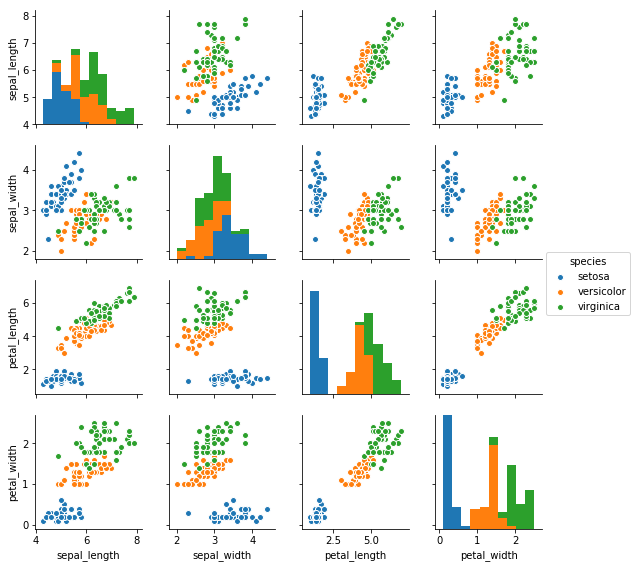

In [6]:
sn.pairplot(a, hue='species', size=2)

In [7]:
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier

In [8]:
X = a.drop(['petal_length','sepal_width','species'], axis=1)

In [9]:
import sklearn.preprocessing as pp
le = pp.LabelEncoder()
y = le.fit_transform(a['species'].astype(str))

In [10]:
np.unique(y)
a['species'].unique()

array([0, 1, 2])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
dtc = DecisionTreeClassifier(max_depth=2).fit(X,y)

In [12]:
# This code is a simplified version of https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/helpers_05_08.py
def visualize_classifier(model, X, y):
    ax = plt.gca()
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
    
    model.fit(X, y)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    def plot_boundaries(i, xlim, ylim):
    
        if i >= 0:
            tree = model.tree_

            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],[xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],[tree.threshold[i], xlim[1]], ylim)

            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,[ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,[tree.threshold[i], ylim[1]])
            
    plot_boundaries(0, xlim,ylim)

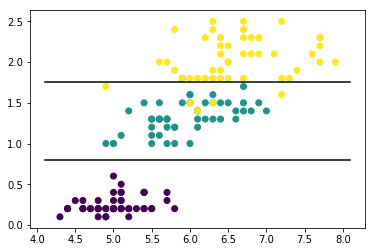

In [13]:
visualize_classifier(dtc, X, y)

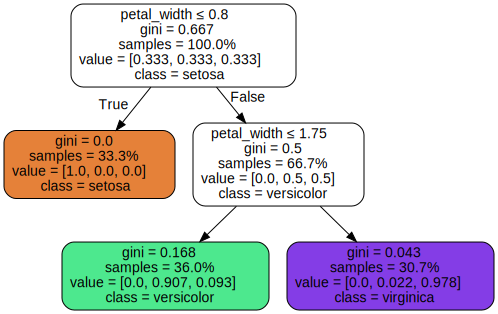

In [14]:
import graphviz
dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X.columns), 
                         class_names = [i for i in a['species'].unique()],
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph  

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rnc = RandomForestClassifier(n_estimators=100)

In [17]:
# This code is a simplified version of https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb

def visualize_rf(model, X, y):
    ax = plt.gca()
    
    # Plot the training points
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

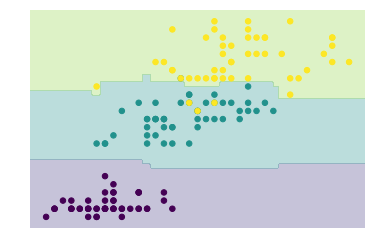

In [18]:
visualize_rf(rnc,X,y)

# Let's try this together

## The manual approach

In [19]:
raw = pd.read_csv('https://raw.githubusercontent.com/mschermann/msis2802winter2018classes/master/adult.csv')

In [20]:
raw.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [21]:
income = raw.copy()
income.replace('?', np.nan, inplace=True)
income.drop(['education','fnlwgt'] , axis=1, inplace=True)

In [22]:
le_income = pp.LabelEncoder()
y = le_income.fit_transform(income['income'].astype(str))

In [23]:
income['d_age'] = pd.qcut(income['age'], q=5)
income.drop('age', axis=1, inplace=True)

In [24]:
dc = income.columns.drop(['capital.gain','capital.loss', 'income', 'education.num'])

In [25]:
income = pd.get_dummies(income, columns=dc, dummy_na=True)

In [26]:
X = income.drop('income', axis=1)

In [27]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
income_dtc = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)

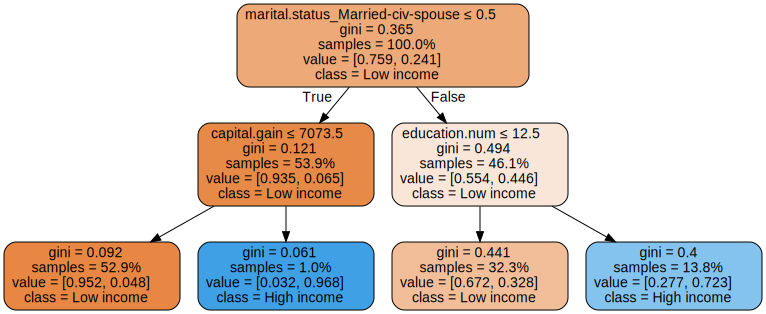

In [29]:
dot_data = sk.tree.export_graphviz(income_dtc, out_file=None, 
                         feature_names=list(X.columns),  
                         class_names = ['Low income' if i == '<=50K' else 'High income' for i in raw['income'].unique()],
                         filled=True, rounded=True, 
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph  

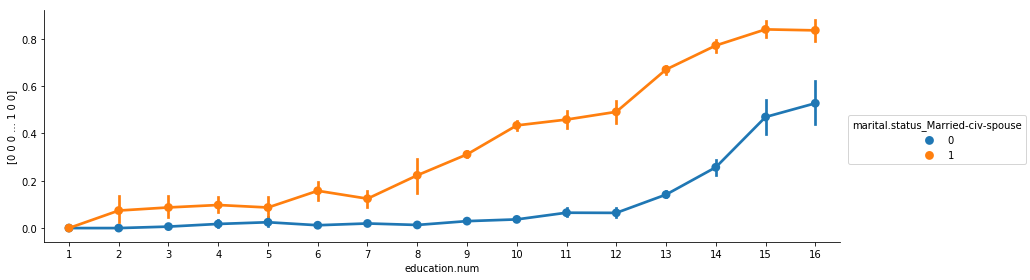

In [30]:
sn.factorplot(x='education.num',y= y ,hue='marital.status_Married-civ-spouse', data=X, aspect =3)

In [31]:
check = X.copy()
check['bcg'] = pd.cut(check['capital.gain'], bins=[check['capital.gain'].min(),70373,check['capital.gain'].max()])

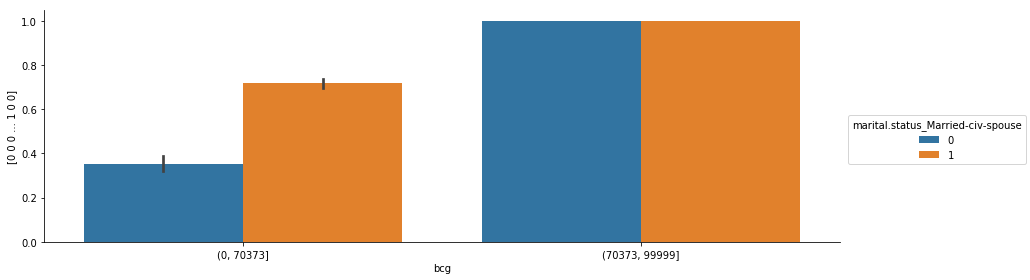

In [32]:
sn.factorplot(x='bcg',y=y,data=check,aspect=3, kind='bar', hue='marital.status_Married-civ-spouse')

In [33]:
y_pred = income_dtc.predict(X_test)
y_prob = income_dtc.predict_proba(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
conm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(conm, columns=['Low Income', 'High income'], index=['Low Income', 'High income'])
cm

,Low Income,High income
Low Income,7021,389
High income,1332,1027


In [35]:
print(sk.metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.95      0.89      7410
          1       0.73      0.44      0.54      2359

avg / total       0.81      0.82      0.81      9769



In [36]:
sk.metrics.roc_auc_score(y_test, y_prob[:,1])

0.8264878413792985

Check [here](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html) for interpretation of measures:
>* The precision is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
* The recall is the ratio `tp / (tp + fn)` where `fn` the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
* The f1 score can be interpreted as a weighted harmonic mean of the precision and recall with 1 = best and 0 = worst. `f1` means that recall and precision have equal weight.
* The support is the number of occurrences of each class in y_true.

## A pipeline 

The pipeline is supposed to:
* Select the [best features](http://scikit-learn.org/stable/modules/feature_selection.html)
* Estimate using RandomForest

In [37]:
import sklearn.feature_selection as fs
from sklearn.pipeline import make_pipeline

In [38]:
pipe = make_pipeline(fs.SelectKBest(k=10), RandomForestClassifier())

In [39]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=.3,)

In [40]:
%%capture -- no-stderr
m = pipe.fit(X_train, y_train)

In [43]:
y_prediction = m.predict(X_test)

In [44]:
print(sk.metrics.classification_report(y_test, y_prediction))

             precision    recall  f1-score   support

          0       0.88      0.94      0.91      7430
          1       0.76      0.58      0.66      2339

avg / total       0.85      0.86      0.85      9769



Let's include cross-validation for all steps.

In [45]:
parameters = dict(selectkbest__k = [5,10,20],
                 randomforestclassifier__n_estimators=[100, 150, 200])

In [46]:
cv = ms.GridSearchCV(m, param_grid=parameters)

In [47]:
%%capture -- no-stderr

cv.fit(X_train, y_train)
y_predictions = cv.predict(X_test)
y_probability = cv.predict_proba(X_test)
report = sk.metrics.classification_report(y_test, y_predictions);

In [48]:
print(report)

             precision    recall  f1-score   support

          0       0.87      0.95      0.91      7430
          1       0.77      0.56      0.65      2339

avg / total       0.85      0.86      0.85      9769



In [49]:
sk.metrics.roc_auc_score(y_test, y_probability[:,1])

0.9052678066399406

In [50]:
conm = confusion_matrix(y_test, y_predictions)
cm = pd.DataFrame(conm, columns=['Low Income', 'High income'], index=['Low Income', 'High income'])
cm

,Low Income,High income
Low Income,7048,382
High income,1027,1312


In [51]:
%%capture -- no-stderr

results = pd.DataFrame(cv.cv_results_)\
[['mean_test_score', 'param_randomforestclassifier__n_estimators', 'param_selectkbest__k', 'rank_test_score']]\
.sort_values(by='rank_test_score')

In [52]:
results

,mean_test_score,param_randomforestclassifier__n_estimators,param_selectkbest__k,rank_test_score
5,0.853764,150,20,1
2,0.853633,100,20,2
8,0.853282,200,20,3
4,0.849245,150,10,4
7,0.848587,200,10,5
1,0.848543,100,10,6
3,0.819191,150,5,7
6,0.818445,200,5,8
0,0.817787,100,5,9
